# *Pós-graduação em Ciência e Dados e Machine Learning*
### *Trabalho Final - Machine Learning*

**Disciplina:** Fundamentos de Machine Learning

**Professor:** André Juan Costa Vieira

**Turma:** A

**Nomes dos Integrantes:** 

1- Arthur Carvalho de Mario - 52200220

2- Luiz Felipe Carvalho Duarte - 52200246

3- Sergia Teixeira Betti - 51901154

4- Victor Luiz Ferreira - 52200222

## Qualidade de vinhos. 

Você foi contratado como cientista de dados pela famosa vinícula **"Vini Tradizionali di Manduria"** para analisar todos os aspectos dos vinhos produzidos. Diversas questões foram levantadas, como: Compreender os padrões das características que proporcionam bons vinhos, a classificação da qualidade de novos vinhos produzidos, antes que a comunidade mundial **"Vins Spectaculaires"** os deguste, apontar quais são os novos **"blends"** que podem ter continuidade no desenvolvimento, dentre várias outras atividades que visam as boas tomadas de decisões, sempre com o intuito de servir os melhores rótulos, aumentando os lucros e diminuindo os gastos.        

A equipe de enólogos fazem estudos frequentes para verificar as características de cada vinho, colocando-os em planilhas. Para melhor compreensão dos dados, descreveram o que significado de cada propriedade.   


##### Descrição 

**0. Color:** Se o vinho é tinto (vermelho) ou branco

**1. Fixed Acidity:** Qtd.de Ácido não volátil, aquele que não evapora fácil

**2. Volatile Acidity:** Teor de ácido acético que leva a um sabor desagradável de vinagre

**3. Citric Acid:** Um tipo de ácido que age como conservante para aumentar o nível de acidez em pequena quantidade para adicionar aroma e sabor

**4. Residual Sugar:** Qtd. de açúcar restante depois da fermentação, mais de 45g/litro é doce

**5. Chlorides:** Qtd. de sal

**6. Free Sulfur Dioxide:** Componente que impede crescimento microbiano e a oxidação do vinho

**7. Total Sulfur Dioxide:** Qtd. de SO2 (dióxido de enxofre)

**8. Density:** Massa/Volume, os vinhos mais doces tem maior densidade

**9. pH:** Nível de acidez ou potencial hidrogeniônico

**10. Sulphates:** Um adicional que contribui para níveis de SO2 e é 
anti-micróbio e anti-oxidante 

**11. Alcohol:** Qtd. de álcool

**12. Qualidade:** Notas de 0 a 10

# Questões

### Importe todas as bibliotecas necessárias na célula abaixo
##### Organize-as de forma crescente em relação ao tamanho da frase

In [767]:
import math
import random
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings as warn
from sklearn import tree
from numba import vectorize
from sklearn.svm import SVC
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, IsolationForest
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, PolynomialFeatures, normalize
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, classification_report,confusion_matrix, silhouette_score

### Tratamento dos Dados

###### Faltantes e Incongruentes
Sir Pounce, enólogo de longa data, especializado em vinhos italianos, descobriu que estão faltando alguns valores nas planilhas, e que outros dados foram alterados pelo ex-funcionário Smeagle, dispensado por degustar vinhos 'preciosos'.   

**Utilize o dataset 'wines_pre_processing.csv'.**

1- Busque os valores faltantes no dataset e trate-os.

2- Busque os valores incongruentes no dataset e trate-os. 

3- Valide seus tratamentos com o dataset 'wines.csv'.

O dono da vinícula, Sir Donald Shelby, tem um filho cursando especialização em ciência de dados, que, ao deparar-se com o dataset,  pediu a você que, ao invés de tratar os dados faltantes com suas *técnicas triviais*, fizesse um algoritmo de regressão logística para encontrar os valores faltantes na coluna 'Alcohol'. O Sr. Shelby é um homem conhecido como mafioso e considera seu filho um gênio, por isso, você, com fortes receios de sofrer consequências inusitadas por ordem do Don Corleone da atualidade, acatou o "pedido".

**Utilize o dataset devidamente pré processado.**

4- Desenvolver um algoritmo de regressão logística visando preencher os dados faltantes da coluna "Alcohol". Em seguida, valide os resultados com o dataset "wines.csv", apresentando todas as métricas de classificação estudadas. 

5- Você, ao ver os resultados encontrados por utilizar um algoritmo de classificação num problema de regressão, se adiantou e fez um modelo de regressão polinomial para dirimir a questão. Em seguida, validou os resultados com o dataset "wines.csv", utilizando todas as métricas de regressão estudadas. Por fim, escreverá um e-mail explicando o motivo <u>técnico</u> que o levou a não utilizar a regressão logistíca neste problema.

In [768]:
preProc = pd.read_csv('wines_pre_processing.csv')

In [769]:
valid = pd.read_csv('wines.csv')

In [770]:
preProc.head()

,Unnamed: 0,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99,3.28,0.51,13.4,6
1,1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.4,0.75,9.8,5
2,2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.9898,3.28,0.36,12.7,9
3,3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.9962,3.42,0.4,9.3,7
4,4,white,7.1,0.2,0.34,16.0,0.05,51.0,166.0,0.9985,3.21,0.6,9.2,6


In [771]:
preProc = preProc.drop('Unnamed: 0',axis=1)

In [772]:

#turn any non_numeric into na in columns that are supposed to be numeric
for column in preProc.iloc[:,1:]:
    preProc[column] = pd.to_numeric(preProc[column],errors='coerce')

In [773]:
preProc.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6.0
1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5.0
2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9.0
3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7.0
4,white,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6.0


In [774]:
preProc.isna().sum()

color                    3
fixed acidity           18
volatile acidity        13
citric acid             15
residual sugar          13
chlorides               18
free sulfur dioxide     13
total sulfur dioxide    12
density                 12
pH                      13
sulphates               17
alcohol                 15
quality                  5
dtype: int64

In [775]:
#create new color column, replace any non white or red with NaN
anchor = np.where((preProc['color'] != 'white') & (preProc['color'] != 'red'),np.nan,preProc['color'])

In [776]:
preProc['color'] = anchor

In [777]:
#fill in missing numerical data using an Imputer, which deduces missing data based on existing data points

In [778]:
knn = KNNImputer(n_neighbors=3)

In [779]:
preProc[preProc.columns.difference(['alcohol','color'])] = knn.fit_transform(preProc[preProc.columns.difference(['alcohol','color'])])

In [780]:
preProc.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6.0
1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5.0
2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9.0
3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7.0
4,white,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6.0


In [781]:
preProc.isna().sum()

color                   14
fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                 15
quality                  0
dtype: int64

In [782]:
#DECISION TREE TO DETERMINE MISSING COLORS!

In [783]:
tree = DecisionTreeClassifier()

In [784]:
treeTrain = preProc.dropna()
treeTrain

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6.0
1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5.0
2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9.0
3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7.0
4,white,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.6,0.24,0.30,13.0,0.052,18.0,143.0,0.99825,3.37,0.49,9.4,6.0
6493,white,7.2,0.17,0.37,6.9,0.059,47.0,128.0,0.99322,3.08,0.46,11.0,7.0
6494,white,5.8,0.30,0.38,4.9,0.039,22.0,86.0,0.98963,3.23,0.58,13.1,7.0
6495,white,6.6,0.28,0.30,7.8,0.049,57.0,202.0,0.99580,3.24,0.39,9.5,5.0


In [785]:
treeTrainX = treeTrain.drop(['color','alcohol'],axis=1)

In [786]:
treeTrainY = treeTrain['color']

In [787]:
tree.fit(treeTrainX,treeTrainY)

DecisionTreeClassifier()

In [788]:
treePredict = preProc[preProc['color'].isna()]
treePredict

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
468,NaN,9.9,0.400,0.53,6.70,0.097,6.0,19.0,0.99860,3.27,0.82,11.7,7.0
519,NaN,7.4,0.240,0.31,8.40,0.045,52.0,183.0,0.99630,3.09,0.32,8.8,5.0
1000,NaN,6.1,0.340,0.46,4.70,0.029,21.0,94.0,0.99100,3.29,0.62,12.3,6.0
1866,NaN,7.3,0.260,0.33,17.85,0.049,41.5,195.0,1.00000,3.06,0.44,9.1,7.0
1933,NaN,6.7,0.265,0.22,8.60,0.048,54.0,198.0,0.99550,3.25,0.41,10.2,5.0
2077,NaN,5.3,0.320,0.23,9.65,0.026,26.0,119.0,0.99168,3.18,0.53,12.2,6.0
2190,NaN,6.2,0.200,0.26,9.70,0.030,39.0,102.0,0.99080,3.08,0.56,12.9,7.0
2973,NaN,6.4,0.350,0.51,7.80,0.055,53.0,177.0,0.99502,3.12,0.45,9.6,5.0
3798,NaN,9.7,0.530,0.60,2.00,0.039,5.0,19.0,0.99585,3.30,0.86,12.4,6.0
3845,NaN,5.1,0.290,0.28,8.30,0.026,27.0,107.0,0.99308,3.36,0.37,11.0,6.0


In [789]:
colors = tree.predict(treePredict.drop(['color','alcohol'],axis=1))

In [790]:
colors

array(['red', 'white', 'white', 'white', 'white', 'white', 'white',
       'white', 'red', 'white', 'white', 'white', 'red', 'white'],
      dtype=object)

In [791]:
#need to use fillna to replace the nans in the color column, but in order to do that i need to put the replacement colors
#in a dataframe

In [792]:
checkingTree = pd.DataFrame(index=preProc.index[preProc['color'].isnull()],data=colors,columns=['color'])
checkingTree

,color
468,red
519,white
1000,white
1866,white
1933,white
2077,white
2190,white
2973,white
3798,red
3845,white


In [793]:
preProc['color'].fillna(checkingTree.squeeze(),inplace=True)

In [794]:
#verifying color deduction

In [795]:
valid

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6
1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7
4,white,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.6,0.24,0.30,13.0,0.052,18.0,143.0,0.99825,3.37,0.49,9.4,6
6493,white,7.2,0.17,0.37,6.9,0.059,47.0,128.0,0.99322,3.08,0.46,11.0,7
6494,white,5.8,0.30,0.38,4.9,0.039,22.0,86.0,0.98963,3.23,0.58,13.1,7
6495,white,6.6,0.28,0.30,7.8,0.049,57.0,202.0,0.99580,3.24,0.39,9.5,5


In [796]:
#valid['color'] = le_color.transform(valid['color'])

In [797]:
preProc['color'].compare(valid['color'])

,self,other


In [798]:
#preProc['color'].fillna("white",inplace=True)

In [799]:
preProc['color'].isna().sum()

0

In [800]:
#encoding colors for learning models

In [801]:
le_color = LabelEncoder()


In [802]:
preProc['color'] = le_color.fit_transform(preProc['color'])

In [803]:
#test = np.where((scratch['color'] != 'white') & (scratch['color'] != 'red'),np.nan,scratch['color'])

In [804]:
preProc.isna().sum()

color                    0
fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                 15
quality                  0
dtype: int64

In [805]:
#all data has been treated, now to make the logistic and polinomial regression models

In [806]:
logis = preProc.copy()

In [807]:
poli = preProc.copy()

In [808]:
train = preProc.dropna()

In [809]:
X = train.drop('alcohol',axis=1)
y = train['alcohol']

In [810]:
#tofill has just the entries where alcohol is NaN

In [811]:
tofill = preProc[preProc['alcohol'].isna()]
tofill

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
865,1,6.8,0.41,0.30,8.8,0.045,28.0,131.0,0.99530,3.12,0.59,NaN,5.0
1151,0,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,NaN,8.0
1382,1,7.7,0.35,0.46,11.8,0.088,61.0,183.0,0.99786,2.86,0.47,NaN,5.0
1604,0,8.1,0.82,0.00,4.1,0.095,5.0,14.0,0.99854,3.36,0.53,NaN,5.0
1747,0,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,NaN,4.0
2333,1,7.4,0.29,0.48,12.8,0.037,61.5,182.0,0.99808,3.02,0.34,NaN,5.0
2614,0,11.9,0.38,0.49,2.7,0.098,12.0,42.0,1.00040,3.16,0.61,NaN,5.0
2703,1,5.5,0.24,0.32,8.7,0.060,19.0,102.0,0.99400,3.27,0.31,NaN,5.0
2742,1,6.5,0.33,0.32,1.0,0.041,39.0,120.0,0.99004,3.06,0.37,NaN,6.0
3197,1,6.4,0.30,0.27,4.4,0.055,17.0,135.0,0.99250,3.23,0.44,NaN,6.0


In [812]:
X_predict = tofill.drop('alcohol',axis=1)
X_predict

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
865,1,6.8,0.41,0.30,8.8,0.045,28.0,131.0,0.99530,3.12,0.59,5.0
1151,0,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,8.0
1382,1,7.7,0.35,0.46,11.8,0.088,61.0,183.0,0.99786,2.86,0.47,5.0
1604,0,8.1,0.82,0.00,4.1,0.095,5.0,14.0,0.99854,3.36,0.53,5.0
1747,0,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,4.0
2333,1,7.4,0.29,0.48,12.8,0.037,61.5,182.0,0.99808,3.02,0.34,5.0
2614,0,11.9,0.38,0.49,2.7,0.098,12.0,42.0,1.00040,3.16,0.61,5.0
2703,1,5.5,0.24,0.32,8.7,0.060,19.0,102.0,0.99400,3.27,0.31,5.0
2742,1,6.5,0.33,0.32,1.0,0.041,39.0,120.0,0.99004,3.06,0.37,6.0
3197,1,6.4,0.30,0.27,4.4,0.055,17.0,135.0,0.99250,3.23,0.44,6.0


In [813]:
################# Loucura pra regressão logística dar certo ##################
#alcohol needs to be a categorical value, so we need to run a label encoder through it for the model to work

In [814]:
logis.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6.0
1,0,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5.0
2,1,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9.0
3,1,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7.0
4,1,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6.0


In [815]:
log = LogisticRegression(C=1e7,solver='liblinear')

In [816]:
le_alcohol = LabelEncoder()

In [817]:
y

0       13.4
1        9.8
2       12.7
3        9.3
4        9.2
        ... 
6492     9.4
6493    11.0
6494    13.1
6495     9.5
6496    11.1
Name: alcohol, Length: 6482, dtype: float64

In [818]:
y_le = le_alcohol.fit_transform(y)

In [819]:
y_le

array([100,  24,  89, ...,  96,  15,  53])

In [820]:
#the logistic regression model wasn't converging, so we scaled all values to the 0-1 range

In [821]:
scaler = MinMaxScaler(feature_range=(0,1))

In [822]:
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [823]:
X_scaled

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,1.0,0.231405,0.226667,0.198795,0.033742,0.041528,0.048611,0.182028,0.055716,0.434109,0.162921,0.500000
1,0.0,0.256198,0.366667,0.012048,0.019939,0.114618,0.059028,0.055300,0.192982,0.527132,0.297753,0.333333
2,1.0,0.256198,0.186667,0.204819,0.055215,0.014950,0.194444,0.260369,0.051860,0.434109,0.078652,1.000000
3,1.0,0.239669,0.020000,0.204819,0.125767,0.056478,0.138889,0.246544,0.175246,0.542636,0.101124,0.666667
4,1.0,0.272727,0.080000,0.204819,0.236196,0.068106,0.173611,0.368664,0.219587,0.379845,0.213483,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
6477,1.0,0.231405,0.106667,0.180723,0.190184,0.071429,0.059028,0.315668,0.214768,0.503876,0.151685,0.500000
6478,1.0,0.280992,0.060000,0.222892,0.096626,0.083056,0.159722,0.281106,0.117794,0.279070,0.134831,0.666667
6479,1.0,0.165289,0.146667,0.228916,0.065951,0.049834,0.072917,0.184332,0.048583,0.395349,0.202247,0.666667
6480,1.0,0.231405,0.133333,0.180723,0.110429,0.066445,0.194444,0.451613,0.167534,0.403101,0.095506,0.333333


In [824]:
#reg.max_iter = 10000

In [825]:
log.fit(X_scaled,y_le)

LogisticRegression(C=10000000.0, solver='liblinear')

In [826]:
resultLog = log.predict(X_predict)

In [827]:
#same thing to fill the missing data

In [828]:
checkingLog = pd.DataFrame(index=preProc.index[preProc.isnull().any(axis=1)],data=resultLog,columns=['alcohol'])
checkingLog

,alcohol
865,51
1151,51
1382,51
1604,51
1747,51
2333,51
2614,51
2703,51
2742,51
3197,51


In [829]:
logis.fillna(checkingLog,inplace=True)

In [830]:
#Now for the linear

In [831]:
lr = LinearRegression()
pl = PolynomialFeatures()


In [832]:
X_poly = pl.fit_transform(X)

In [833]:
#X_poly = pd.DataFrame(X_poly, columns = X.columns)

In [834]:
lr.fit(X_poly,y)

LinearRegression()

In [835]:
resultPoli = lr.predict(pl.transform(X_predict))

In [836]:
resultPoli


array([10.09681675, 12.09215746,  8.93384844,  9.69822047, 11.98811394,
        8.93891465,  9.62918939, 10.30896065, 11.40709049, 10.9122613 ,
       10.86477506, 10.24939033,  9.75046947, 12.05207681,  9.1314725 ])

In [837]:
checking = pd.DataFrame(index=preProc.index[preProc.isnull().any(axis=1)],data=resultPoli,columns=['alcohol'])

In [838]:
poli = poli.fillna(checking)

A função logística irá tentar classificar as entradas entre duas possibilidades, o que vai contra a natureza contínua da coluna 'alcohol'.

### Análise Exploratória
**Utilize o dataset 'wines.csv'**

A enóloga Marilyn Monroe, direta do Sir Pounce, tomou conhecimento de suas habilidades exploratórias e requereu gráficos "chiques e enfeitados" que mostrassem, de forma iterativa todas as informações. A principal exigência é de que as paletas de cores sejam harmônicas aos olhos, de modo que possam ser utilizadas em apresentações. Para isso, sugeriu a documentação a seguir:
[Colors Palettes](https://plotly.com/python/builtin-colorscales/)

1- Utilize um countplot para averiguar a quantidade de vinhos por cada avaliação de qualidade. 
Separare entre vinhos tintos e brancos, fazendo um gráfico para cada.

2- Utilize um jointplot para descrever a relação entre qualidade e açucar. Utilizar o tipo 'KDE'.

3- Utilize um boxplot para verificar se existe algum vinho que seja considerado um outlier. Utilize **x = 'quality'** e **y='residual sugar'**. Identificando os outliers, crie um novo dataframe, utilize um barplot para contabilizar a quantidade de vinhos tintos
e brancos por qualidade de modo que as barras estejam sobrepostas em relação ao tipo de vinho.   

4- Faça um gráfico de correlação e encontre quais são as 'features' que tem contém correlações
positivas e negativas fortes  entre si. Em seguida, utilize o scatterplot, colocando no eixo "x" e "y"
cada variável correlata e descreva por escrito o motivo da distribuição e o sentido vetorial estarem apresentados
das respectivas formas.

**ps**: Para este problema, enteda como correlações fortes valores menores que -0.4 e maiores que 0.4.

In [839]:
wines = pd.read_csv("wines.csv")

In [840]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [841]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


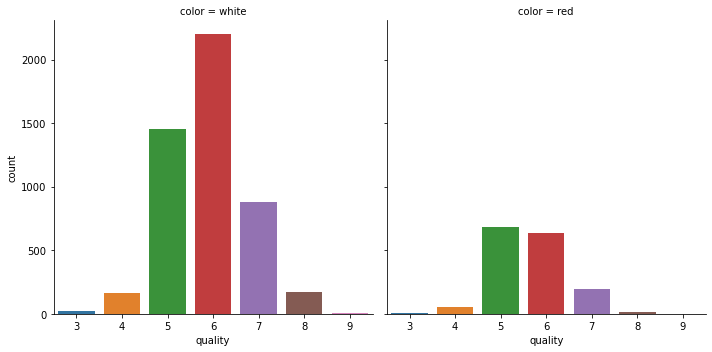

In [842]:
# Countplot comparando a quantidade de vinhos por cada avalização, separados pelos tipos de vinho (Tinto e Branco)
sns.catplot(data=wines, x="quality", kind="count", col="color")

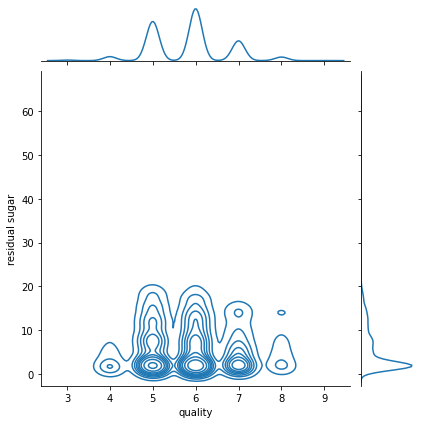

In [843]:
# Jointplot relacionando a qualidade do vinho com a quantidade de açúcar contido nos mesmos
sns.jointplot(data=wines, x="quality", y="residual sugar", kind="kde")

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

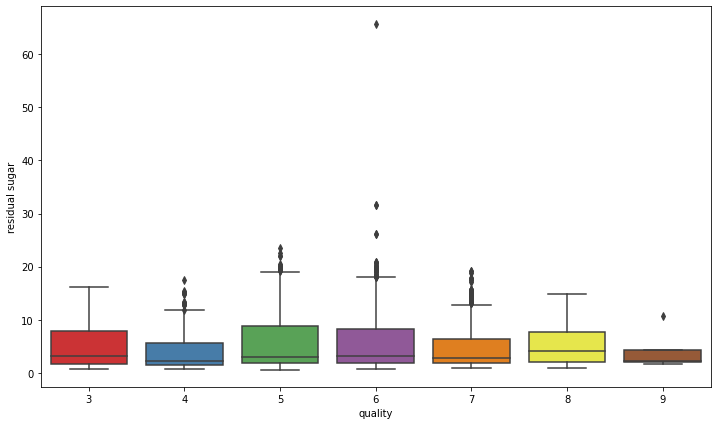

In [844]:
# Boxplot  x= quality y= residual sugar
plt.figure(figsize=(12,7))
sns.boxplot(data=wines, x="quality", y="residual sugar", palette="Set1")

In [845]:
# IQR (Interquadratil Range) = 9.45
# Outliers Menores = -7.65
# Outliers Maiores = 17.55

# Necessário rodar a coluna de Residual Sugar para dropar os valores acima de 17.55 (Outliers)

wines2 = wines.drop(wines[wines["residual sugar"] > 17.55].index)

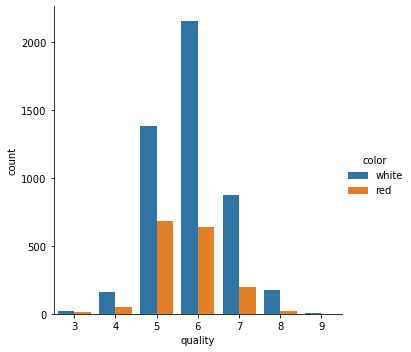

In [846]:
# Barplot da quantidade de vinhos de cada tipo por qualidade

sns.catplot(data=wines2, x="quality", hue="color", kind="count")

No gráfico abaixo, é demonstrado em um gráfico de dispersão a correlação entre a acidez fixa e o pH dos vinhos.

Nota-se que os vinhos tintos em especial possuem uma correlação negativa em relação ao pH, bem como possuem um padrão maior de acidez fixa comparado aos vinhos brancos. Isto acontece pois um índice baixo de pH (abaixo de 7) indica que a solução do vinho é ácida. Logo, quanto maior for a acidez fixa dos vinhos, menor o pH deles será.

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

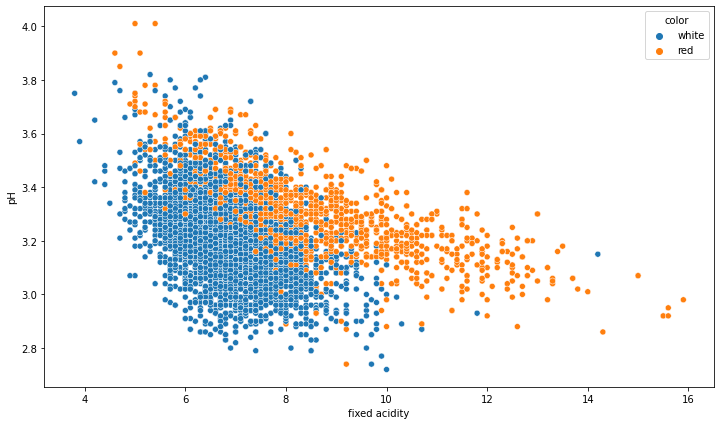

In [847]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=wines2, x="fixed acidity", y="pH", hue="color")

### Modelos Supervisionados de Classificação
**Utilize o dataset 'wines.csv'.**

Após alguns meses, o filho do Sr. Donald Shelby, Chuck Norris Shelby, mais conhecido como "El Chavo del Ocho", em decorrência de seu "notório" saber e comportamento extrovertido, ~para ser eufemista~, foi promovido a "head" de Machine Learning, vulgo seu chefe. 

Com suas inusitadas e inovadoras ideias, pediu que você criasse três modelos de árvores, um do tipo "random" e dois deles do tipo "boost", pois havia descoberto que a otimização pelo gradiente descendente era considerado como "*The American Dream*". Não obstante, gostaria de analisar o gráfico de importância de features de cada um.

Ademais, requereu que utilizasse o algoritmo SVM, pelo fato do "kernel trick" performar bem em problemas de altas dimensionalidades. Um KNN "cairia bem também, vamos utilizar por mero desencargo de consiência", disse.  

Exigiu que fosse utilizado o "Cross Validation" em todos os treinos, com um dos diversos métodos do "K-fold" para ter certeza de que há generalização dos dados. 

Em seu discurso inflamado, se pronunciava: "Precisamos realizar tais façanhas nunca vistas na história da Inteligência Artificial, desde que as redes neurais foram introduzidas por Walter Pitts e Warren McCulloch em 1943. Vamos predizer tudo que quisermos, independentemente da uva utilizada na produção. Eu transformarei nossa vinícula na melhor do mundo, pois sou detentor do saber". Tudo dito numa reunião contendo 12 pessoas, trabalhadores braçais inclusos. Tal discurso invejou os oráculos delfos e os lembraram de sócrates em seu julgamento, antes de morrer. 

Após tamanhas proclamações, apontou em sua direção e disse: **"VOCÊ, É..., VOCÊ MESMO**, irás fazer todo o processo por conta própria, e eu direi se o que fazes está correto! Não utilizarás Auto-ML, pois eu, ~professor~, quero ter certeza de que entende seu labor e suas nuâncias". 

Você, cansado e entediado de tantas lorotas, se retirou da reunião com "dores" de barriga, porém ainda recebeu um e-mail lhe instruindo a comparar os resultados de todas as implementações, escolher o melhor modelo e utilizar os algoritmos de otimização: Random Search e Grid Search.  

Em suma?

1- Utilizar três algoritmos de árvores, sendo dois do tipo 'boost' e um do tipo 'random' e fazer um gráfico de importância de features

2- Utilizar SVM

3- Utilizar KNN

4- Crie um DataFrame que contenha todos os resultados de todos os algoritmos utilizados, inclusive a métrica ROC AUC.

5- Comparar os resultados, escolher o melhor modelo e otimizar os parâmentros. Ao fim, faça um gráfico da ROC AUC.

**ps:** Lembre-se de fazer todo processo tanto para os vinhos tintos, quanto para os brancos.  

In [848]:
svc = SVC(gamma="auto")
warn.filterwarnings('ignore')

In [849]:
df = pd.read_csv('wines.csv')

In [850]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [851]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [852]:
df.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6
1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7
4,white,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6


In [853]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [854]:
#sns.distplot(df['quality'])

In [855]:
#sns.countplot(x='color', data=df)

In [856]:
#sns.heatmap(df.corr(), annot=True) #annot mostra os coeficientes da matriz (usado em classificação)

In [857]:
#sns.jointplot(x='quality', y='fixed acidity', data=df)

In [858]:
#Padronizando Variáveis

#criando objeto
scaler = StandardScaler()

In [859]:
scaler.fit(df.drop('color',axis=1))

StandardScaler()

In [860]:
StandardScaler()

StandardScaler()

In [861]:
#Utilizando o método .transform () para transformar os parâmetros em uma versão padronizada.


scaled_features = scaler.transform(df.drop('color',axis=1))

In [862]:
#Converta os parâmetros padronizados em um DataFrame

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.474652,0.487985,0.078226,-0.555601,-0.628984,-0.874763,-0.543983,-1.566358,0.382517,-0.142937,2.438496,0.207999
1,-0.243230,1.763621,-2.055193,-0.744778,0.627050,-0.705730,-1.517133,0.808208,1.128903,1.470026,-0.580068,-0.937230
2,-0.243230,0.123518,0.147046,-0.261325,-1.085723,1.491697,0.057600,-1.633059,0.382517,-1.151040,1.851553,3.643685
3,-0.397511,-1.395096,0.147046,0.705582,-0.372068,0.590188,-0.048561,0.501382,1.253300,-0.882212,-0.999313,1.353228
4,-0.088949,-0.848395,0.147046,2.219002,-0.172244,1.153631,0.889201,1.268447,-0.052874,0.461924,-1.083162,0.207999


# ALGORITMO KNN

In [863]:
#Divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['quality'],test_size=0.30)

In [864]:
#knn

#Criar uma Instância
knn = KNeighborsClassifier(n_neighbors=5)
#Ajustando o modelo aos dados de treinamento
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [865]:
#Avaliando o Modelo
pred = knn.predict(X_test)

In [866]:
#criar matriz de confusão
print(confusion_matrix(y_test,pred))

[[  0  10   4   0   0   0   0]
 [  1  29  28   0   0   0   0]
 [  0   0 602  21   0   0   0]
 [  0   0  18 839   3   0   0]
 [  0   0   0  33 296   0   0]
 [  0   0   0   0  31  33   0]
 [  0   0   0   0   0   2   0]]


## RESULTADO KNN 

In [867]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        14
           4       0.74      0.50      0.60        58
           5       0.92      0.97      0.94       623
           6       0.94      0.98      0.96       860
           7       0.90      0.90      0.90       329
           8       0.94      0.52      0.67        64
           9       0.00      0.00      0.00         2

    accuracy                           0.92      1950
   macro avg       0.64      0.55      0.58      1950
weighted avg       0.91      0.92      0.92      1950



In [868]:
#Escolhenbdo o valor k
error_rate = []

# Levará algum tempo
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

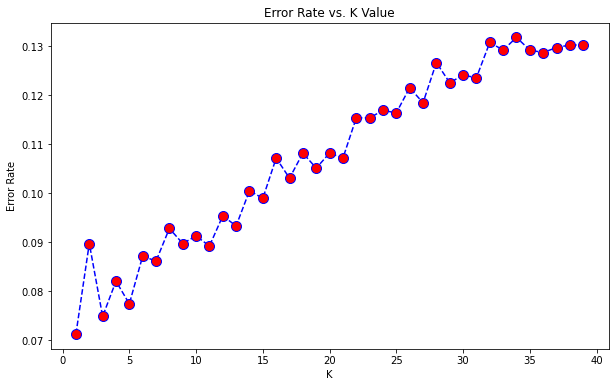

In [869]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [870]:
error_rate.index(min(error_rate))

0

## RESULTADO KNN COM K VIZINHOS

In [871]:
#RESULTADO KNN

#treinando novamente o modelo

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Com K= 1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Com K= 1


[[  1  11   2   0   0   0   0]
 [  1  34  22   1   0   0   0]
 [  0   4 590  29   0   0   0]
 [  0   0  26 826   8   0   0]
 [  0   0   0  20 309   0   0]
 [  0   0   0   0  13  51   0]
 [  0   0   0   0   0   2   0]]


              precision    recall  f1-score   support

           3       0.50      0.07      0.12        14
           4       0.69      0.59      0.64        58
           5       0.92      0.95      0.93       623
           6       0.94      0.96      0.95       860
           7       0.94      0.94      0.94       329
           8       0.96      0.80      0.87        64
           9       0.00      0.00      0.00         2

    accuracy                           0.93      1950
   macro avg       0.71      0.61      0.64      1950
weighted avg       0.92      0.93      0.92      1950



# ALGORITMO GRADIENT BOOSTER

In [872]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## RESULTADO GRADIENT BOOSTER

In [873]:
#RESULTADO GRADIENT BOOSTER

gradient_booster.fit(X_train,y_train)
print(classification_report(y_train,gradient_booster.predict(X_train)))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00       158
           5       1.00      1.00      1.00      1515
           6       1.00      1.00      1.00      1976
           7       1.00      1.00      1.00       750
           8       1.00      1.00      1.00       129
           9       1.00      1.00      1.00         3

    accuracy                           1.00      4547
   macro avg       1.00      1.00      1.00      4547
weighted avg       1.00      1.00      1.00      4547



# ALGORITMO SVM

In [874]:
#testando o algoritmo SVM

#divisão treino e teste

X = df_feat
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [875]:
svc_model = SVC()

In [876]:
svc_model.fit(X_train,y_train)

SVC()

In [877]:
#avaliação do Modelo

predictions = svc_model.predict(X_test)

In [878]:
print(confusion_matrix(y_test,predictions))

[[  0   6   0   1   0   0   0]
 [  0  63   5   1   0   0   0]
 [  0   0 625   0   0   0   0]
 [  0   0   1 876   0   0   0]
 [  0   0   0   2 312   0   0]
 [  0   0   0   0   3  52   0]
 [  0   0   0   0   0   3   0]]


## RESULTADO SVM

In [879]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.91      0.91      0.91        69
           5       0.99      1.00      1.00       625
           6       1.00      1.00      1.00       877
           7       0.99      0.99      0.99       314
           8       0.95      0.95      0.95        55
           9       0.00      0.00      0.00         3

    accuracy                           0.99      1950
   macro avg       0.69      0.69      0.69      1950
weighted avg       0.98      0.99      0.99      1950



Após todos seus esforços, o amado chefe lhe pediu para utilizar um algoritmo que ele ouviu falar, criado pelo matemático inglês Thomas Bayes. Cabe a você, mais uma vez a, aplicar o algoritmo e apresentar os resultado. Em seguida, faça uma breve explicação do principal problema desse método para solucionar problemas complexos.  

## NAIVE BAYES

In [880]:
#Definindo dados

In [881]:
X = df_feat
y =  df['quality']

In [882]:
model = GaussianNB()

In [883]:
model.fit(X, y)

GaussianNB()

In [884]:
predictions = model.predict(X_test)

In [885]:
print (predictions)

[7 6 6 ... 5 5 6]


## NAIVE BAYES 

### breve explicação do principal problema desse método para solucionar problemas complexos.

Apesar da ampla utilização e diversas vantagens no uso existem algumas desvantagens no uso do algoritmos naive bayes:
A impossibilidade de ter um conjunto de dados na vida real que sejam completamente independentes.
É considerado um mal estimador, uma vez que probabilidades calculadas pelo algoritmo não devem ser consideradas como precisas.
Se a variável categórica tem uma categoria (no conjunto de dados de teste) que não foi observada no conjunto de dados de treinamento, 
então o modelo irá atribuir uma probabilidade de zero e não será capaz de fazer uma previsão.

### Modelos não Supervisionados

**Utilize o dataset 'wines.csv' e 'wines_splines.csv'**

Chuck Norris tem um amigo famoso no mundo da ciência de dados, seu nome é Rocky Balboa. Em uma conversa sobre alguns métodos que podem ser utilizados para criar novos vetores (features engineering), o Sr.Rocky propôs que fossem utilizados Splines cúbicos. Completamente emocionado com a ideia, Chuck decidiu aplicar esta ténica utilizando até a oitava potências. 

Ele pediu a você que fizesse um estudo comparativo utilizando o PCA. O intuito é analisar se a redução de dimensionalidade pode ser vantajosa para o dataset original e o dataset com Splines. 

1- Compare a variância explicada de cada um dos datasets

2- Explique porque o PCA seria, ou não uma boa abordagem para o dataset com Splines. Ademais, discorra sobre a influência de ruídos.

3- Utilize um loop "for" e crie uma condição para que, quando a variância for maior do que 0.92, seja retornado o número de features totais, faça para ambos datasets.

In [886]:
vinhos = pd.read_csv('wines.csv')
vinhos['color'] = vinhos['color'].apply(lambda x: 0 if x == 'white' else 1)
vinhos

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6
1,1,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
2,0,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3,0,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7
4,0,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.6,0.24,0.30,13.0,0.052,18.0,143.0,0.99825,3.37,0.49,9.4,6
6493,0,7.2,0.17,0.37,6.9,0.059,47.0,128.0,0.99322,3.08,0.46,11.0,7
6494,0,5.8,0.30,0.38,4.9,0.039,22.0,86.0,0.98963,3.23,0.58,13.1,7
6495,0,6.6,0.28,0.30,7.8,0.049,57.0,202.0,0.99580,3.24,0.39,9.5,5


In [887]:
splines = pd.read_csv('wines_splines.csv')
splines.drop(columns= ['Unnamed: 0'] , axis = 1, inplace = True)
splines

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,...,spl_alcohol_7,spl_alcohol_8,spl_quality_1,spl_quality_2,spl_quality_3,spl_quality_4,spl_quality_5,spl_quality_6,spl_quality_7,spl_quality_8
0,0,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,...,792.975760,2057.974073,1.791759,3.210402,5.752268,10.306681,18.467093,33.088589,59.286793,106.227673
1,1,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,...,322.640475,736.388938,1.609438,2.590290,4.168912,6.709604,10.798692,17.379824,27.971747,45.018790
2,0,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,...,685.098154,1741.246833,2.197225,4.827796,10.607752,23.307613,51.212059,112.524396,247.241368,543.244810
3,0,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,...,274.254443,611.591358,1.945910,3.786566,7.368318,14.338084,27.900624,54.292107,105.647563,205.580664
4,0,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,...,265.081780,588.270411,1.791759,3.210402,5.752268,10.306681,18.467093,33.088589,59.286793,106.227673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.6,0.24,0.30,13.0,0.052,18.0,143.0,0.99825,3.37,...,283.595376,635.454906,1.791759,3.210402,5.752268,10.306681,18.467093,33.088589,59.286793,106.227673
6493,0,7.2,0.17,0.37,6.9,0.059,47.0,128.0,0.99322,3.08,...,455.839002,1093.054187,1.945910,3.786566,7.368318,14.338084,27.900624,54.292107,105.647563,205.580664
6494,0,5.8,0.30,0.38,4.9,0.039,22.0,86.0,0.98963,3.23,...,745.796446,1918.645059,1.945910,3.786566,7.368318,14.338084,27.900624,54.292107,105.647563,205.580664
6495,0,6.6,0.28,0.30,7.8,0.049,57.0,202.0,0.99580,3.24,...,293.104526,659.863815,1.609438,2.590290,4.168912,6.709604,10.798692,17.379824,27.971747,45.018790


In [888]:
scaler = StandardScaler()
splines = scaler.fit_transform(splines)

In [889]:
splines

array([[-5.71366589e-01, -4.74651651e-01,  4.87985326e-01, ...,
         7.38232538e-02,  3.34591170e-02, -5.10480048e-03],
       [ 1.75018984e+00, -2.43229807e-01,  1.76362102e+00, ...,
        -9.11644790e-01, -8.88408392e-01, -8.61057029e-01],
       [-5.71366589e-01, -2.43229807e-01,  1.23517984e-01, ...,
         5.05712056e+00,  5.56655705e+00,  6.10619436e+00],
       ...,
       [-5.71366589e-01, -1.09177657e+00, -2.40949358e-01, ...,
         1.40399713e+00,  1.39824994e+00,  1.38425915e+00],
       [-5.71366589e-01, -4.74651651e-01, -3.62438472e-01, ...,
        -9.11644790e-01, -8.88408392e-01, -8.61057029e-01],
       [-5.71366589e-01, -6.28932880e-01, -3.62438472e-01, ...,
         7.38232538e-02,  3.34591170e-02, -5.10480048e-03]])

#### 1

In [890]:
pca = PCA(n_components=11)
splines_pca = pca.fit_transform(splines)
pca.explained_variance_ratio_.sum()

0.9232805708803028

In [891]:
pca = PCA(n_components=1)
vinhos_pca = pca.fit_transform(vinhos)
pca.explained_variance_ratio_.sum()

0.9535283271317728

#### 2

O PCA seria uma boa abordagem para redução de ruídos e de dimensionalidade. Ruidos são ruins para um dataset pois interferem na análise dos dados. 

#### 3

In [892]:
for i in range(117):
    pca = PCA(n_components=i)
    splines_pca = pca.fit_transform(splines)
    if (pca.explained_variance_ratio_.sum()>0.92):
        print(i)
        break

11


In [893]:
for i in range(13):
    pca = PCA(n_components=i)
    vinhos_pca = pca.fit_transform(vinhos)
    if (pca.explained_variance_ratio_.sum()>0.92):
        print(i)
        break

1


In [894]:
splines_pca

array([[ -1.96834854,  -7.62394068,   0.03286421, ...,  -0.55793833,
         -0.35170278,  -2.63748269],
       [ -9.43139526,   1.84183558,  -8.01871816, ...,   0.27610562,
         -0.3684683 ,   0.18455966],
       [  7.04082915, -14.20701154,   2.58510715, ...,  -0.25610119,
         -3.11690872,   5.70039092],
       ...,
       [ -0.19010643,  -8.0617633 ,   0.18761397, ...,  -1.70175952,
          1.9618859 ,  -2.54801008],
       [  5.23267934,   3.90628637,  -2.44127159, ...,   2.286296  ,
         -0.21230464,   0.44098128],
       [ -0.63518381,  -3.12399839,  -0.66844024, ...,  -1.23688945,
          0.89801822,   0.29476778]])

In [895]:
vinhos_pca

array([[-33.58535338],
       [-86.38719225],
       [  9.20555324],
       ...,
       [-30.90653625],
       [ 90.06386816],
       [-20.00302929]])

In [896]:
splines_pca.shape

(6497, 11)

In [897]:
vinhos_pca.shape

(6497, 1)

**Utilize o dataset 'wines.csv'**

Uma ideia realmente interessante é a clusterização. Por vezes, podemos nos espantar com certos resultados. Aqui, você deve utilizar o dataset original e separar cada nota em um cluster. 

1- Validar os resultados do algoritmo Kmeans com o dataset original

2- Aplicar o método do Cotovelo e averiguar se o número de clusters apotandos são iguais ao número de cluster que você tem de usar.

3- Utilizar o método da Silhueta e averiguar se o número de clusters apotandos são iguais ao número de cluster que você tem de usar.

4- Explique os principais conceitos dos métodos das questões 2 e 3.

In [898]:
vinhos

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6
1,1,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
2,0,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3,0,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7
4,0,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.6,0.24,0.30,13.0,0.052,18.0,143.0,0.99825,3.37,0.49,9.4,6
6493,0,7.2,0.17,0.37,6.9,0.059,47.0,128.0,0.99322,3.08,0.46,11.0,7
6494,0,5.8,0.30,0.38,4.9,0.039,22.0,86.0,0.98963,3.23,0.58,13.1,7
6495,0,6.6,0.28,0.30,7.8,0.049,57.0,202.0,0.99580,3.24,0.39,9.5,5


In [899]:
kmeans = KMeans(n_clusters=9)

In [900]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(vinhos)
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(normalized_df)

In [901]:
normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.170948,-0.142012,0.146001,0.023405,-0.166231,-0.188187,-0.261722,-0.162755,-0.468642,0.114446,-0.042766,0.729579,0.062232
1,0.396263,-0.055070,0.399304,-0.465319,-0.168626,0.141971,-0.159785,-0.343496,0.182987,0.255596,0.332830,-0.131334,-0.212199
2,-0.114870,-0.048900,0.024833,0.029563,-0.052538,-0.218279,0.299898,0.011580,-0.328318,0.076903,-0.231410,0.372245,0.732544
3,-0.191850,-0.133474,-0.468437,0.049374,0.236916,-0.124931,0.198170,-0.016306,0.168351,0.420825,-0.296224,-0.335543,0.454378
4,-0.170785,-0.026587,-0.253590,0.043953,0.663273,-0.051485,0.344827,0.265788,0.379147,-0.015804,0.138072,-0.323764,0.062172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.209301,-0.173873,-0.221774,-0.046974,0.581861,-0.042182,-0.258520,0.176655,0.434111,0.345182,-0.101598,-0.335350,0.076193
6493,-0.238272,-0.004924,-0.429794,0.147419,0.127695,0.035310,0.387101,0.090428,-0.205369,-0.359246,-0.199741,0.177701,0.564324
6494,-0.164299,-0.313946,-0.069286,0.121442,-0.032835,-0.139824,-0.138128,-0.151337,-0.485898,0.020567,0.094177,0.628868,0.389127
6495,-0.199965,-0.166117,-0.126845,-0.044879,0.173374,-0.070272,0.522060,0.534126,0.128785,0.046800,-0.332275,-0.291047,-0.328009


In [902]:
kmeans.fit(normalized_df)

KMeans(n_clusters=9)

In [903]:
kmeans.cluster_centers_

array([[-0.1889395 , -0.09350332, -0.09993137,  0.08311375,  0.22853857,
        -0.04030256,  0.417465  ,  0.40327532,  0.14584184, -0.09073686,
        -0.08993468, -0.24607442, -0.16445524],
       [ 0.38822421,  0.37868852,  0.08067105,  0.19339328, -0.13027246,
         0.19820932, -0.19558191, -0.28793093,  0.18782568,  0.0316288 ,
         0.28160307,  0.04116662,  0.03143916],
       [-0.2117306 ,  0.14543777, -0.20191546,  0.22642205, -0.21911141,
        -0.09546313, -0.18048675, -0.00953208, -0.2023057 , -0.26805874,
        -0.10246229,  0.01375048, -0.1771624 ],
       [ 0.43671395,  0.04007688,  0.39281776, -0.29318002, -0.15993656,
         0.17751258, -0.18964782, -0.28695098,  0.13749465,  0.22471799,
         0.10604714, -0.07194088, -0.11496209],
       [-0.18100249, -0.04016957, -0.13532176,  0.0484715 ,  0.51861623,
        -0.05936509,  0.1004238 ,  0.19349885,  0.31305219, -0.16129347,
        -0.08707766, -0.26386644, -0.00338218],
       [-0.18475592, -0.222005

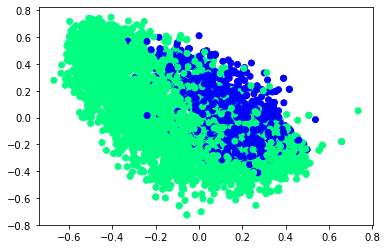

In [904]:
plt.scatter(x=normalized_df[8],y=normalized_df[11],c = KMeans(n_clusters = 2).fit_predict(normalized_df), cmap =plt.cm.winter)
plt.show()

In [905]:
normalized_df.shape

(6497, 13)

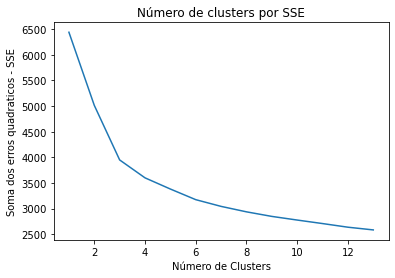

In [906]:
#Cotovelo
sse = {}
faixa = range(1,14)
for kclusters in faixa:
    kmeans1 = KMeans(n_clusters=kclusters)
    kmeans1.fit(normalized_df)
    sse[kclusters] = kmeans1.inertia_
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de Clusters")
plt.ylabel("Soma dos erros quadraticos - SSE")
plt.title("Número de clusters por SSE")
plt.show()

In [907]:
def elbow(array):
    se = []
    for n in range(2,14):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=array)
        se.append(kmeans.inertia_)
        
    x1, y1 = 2, se[0]
    x2, y2 = 14, se[len(se)-1]
    
    distances = []
    for i in range(len(se)):
        x0 = i+2
        y0 = se[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2-y1)**2 + (x2-x1)**2)
        distances.append(numerator/denominator)
        
    return distances.index(max(distances)) + 2

In [908]:
elbow(normalized_df)

6

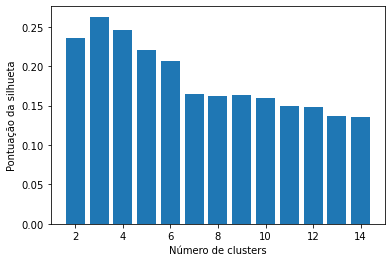

[0.2356591486903016, 0.2628702050301857, 0.24649880490607748, 0.22006290431641193, 0.2063073950528301, 0.164373681577082, 0.16266128679037, 0.1633055396306903, 0.15989792601240427, 0.14905366350864876, 0.1486251129359672, 0.13678909190440774, 0.1357723857909255]


In [909]:
#Silhueta
silhouette_scores = []
faixa = range(2, 15)
for n_cluster in faixa:
    silhouette_scores.append(
        silhouette_score(normalized_df, KMeans(n_clusters = n_cluster).fit_predict(normalized_df)))
k = list(faixa)
plt.bar(k, silhouette_scores)
plt.xlabel("Número de clusters", fontsize = 10)
plt.ylabel("Pontuação da silhueta", fontsize = 10)
plt.show()
print(silhouette_scores)

A Curva de Cotovelo ou Método Elbow Curve é uma técnica usada para encontrar a quantidade ideal de clusters K. Este método testa a variância dos dados em relação ao número de clusters. O valor ideal de K é aquele que tem um menor Within Sum of Squares (WSS) e ao mesmo tempo o menor número de clusters. É chamado curva de cotovelo pois a partir do ponto que seria o “cotovelo” não existe uma discrepância tão significativa em termos de variância. Dessa forma, a melhor quantidade de clusters K seria exatamente onde o cotovelo estaria.

A silhueta é uma medida do quanto observações mais similares estão próximas entre si e, ao mesmo tempo, o quanto estão distantes de outros clusters diferentes. Busca maior coesão dentro do cluster e maior separação entre clusters. A silhueta vai de -1 a 1, onde o maior valor indica que a observação se encaixou mais dentro do cluster e se distanciou dos outros clusters. Se a silhueta for negativa, a configuração do cluster pode ter ou clusters de mais ou clusters de menos. A silhueta também usa a distância euclidiana para medir a distância entre as observações.

A Università di Bologna tem cursos de graduação e pós graduação em enologia. Os grandes enólogos do mundo são os únicos que podem fazer o doutorado nesta renomada universidade. Esta instituição tem um contrato milionário com o Sr.Donald, onde todos os alunos poderiam comparecer uma semana a cada três meses para estudar as características, mecânicas de plantações, tecnologias, processos de confecção dos vinhos, entre outras questões. Todos os professores, escanções extramente conceituados, sempre estão presentes. 

Caso infortúnio, O Sr.Hafþór Júlíus Björnsson, mais conhecido como "o Montanha", chefe de segurança cibernética da empresa apertou o botão DEFCON-1 ao perceber que os servidores tinham sido 'hackeados'. Momento em que notou que os bancos de dados que continham as notas dos vinhos haviam sido alterados/deletados e o backup infectado por um Ransomware chamado "HUE HUE HUE BR". Aparentemente, os black-hats conseguiram alterar de 5% a 25% dos dados referentes aos vinhos tintos, antes que o Montanha conseguisse exterminar as conexões dos servidores. 

O Sr.Donald Shelby aproximou-se de você para falar você sobre as políticas da empresa, criadas por sua esposa, dispunham sobre o bem estar, ambiente não tóxico, agregação dos "colaboradores" ~pseudo escrevados~ como familiares, dentre outros ideais da mesma seara. Em seguida incorporou o espírito de Don Corleone e proferiu uma de suas máximas ao falar "Política é saber a hora de puxar o gatilho".   

Uma das regras empresa dispõe sobre a impossibilidade de extrair datasets como arquivos e, toda vez que for utilizar os dados no Jupyter Notebook, deve ser realizado uma query no datalake. Ocorre que, 'sem querer querendo', você estava desatento e salvou os dados para estudos quando estivesse em casa. Nítido que se disse-se que havia copiado dados seria torturado, por isso não poderia simplesmente aparecer com os dados e colocá-los de volta no banco e como não queria morrer, pegou seu disquete que continha a cópia de parte dos dados e decidiu fazer um modelo usando Isolation Forest. A ideia é treinar o modelo utilizando o dataset 'wines.csv', fazer a predição no dataset 'wines_hacked.csv' e comparar os resultados com o dataset 'wines.csv'. Já que ninguém na vinícula entende o que você faz e Machine Learning é considerado mágica, isso pode dar certo. 

1- Analise seus resultados e altere o modelo até que consiga acertar todos os vinhos com nota oito e nove. Os vinhos com notas menores do que oito que não sejam devidamente identificados pelo algoritmo com a devida nota podem ser deletados.

3- Após terminar as questões acima, exporte o dataset com o nome 'wines_questao_final.csv'.

**ps**: Não haverá desconto de nota caso não consiga acertar todos os vinho de nota oito e nove, porém se não houver uma acurácia maior de 90% seus resultados na próxima questão podem ser devidamente prejudicados.

In [916]:
hacked = pd.read_csv('wines_hacked.csv')
hacked.drop(columns= ['Unnamed: 0'] , axis = 1, inplace = True)
hacked['color'] = hacked['color'].apply(lambda x: 0 if x == 'white' else 1)
hacked

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6
1,1,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
2,0,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,6
3,0,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7
4,0,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.6,0.24,0.30,13.0,0.052,18.0,143.0,0.99825,3.37,0.49,9.4,6
6493,0,7.2,0.17,0.37,6.9,0.059,47.0,128.0,0.99322,3.08,0.46,11.0,7
6494,0,5.8,0.30,0.38,4.9,0.039,22.0,86.0,0.98963,3.23,0.58,13.1,10
6495,0,6.6,0.28,0.30,7.8,0.049,57.0,202.0,0.99580,3.24,0.39,9.5,5


In [917]:
vinhos

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6
1,1,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
2,0,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3,0,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7
4,0,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.6,0.24,0.30,13.0,0.052,18.0,143.0,0.99825,3.37,0.49,9.4,6
6493,0,7.2,0.17,0.37,6.9,0.059,47.0,128.0,0.99322,3.08,0.46,11.0,7
6494,0,5.8,0.30,0.38,4.9,0.039,22.0,86.0,0.98963,3.23,0.58,13.1,7
6495,0,6.6,0.28,0.30,7.8,0.049,57.0,202.0,0.99580,3.24,0.39,9.5,5


In [918]:
hacked['Anomalia'] = (hacked['quality'] != vinhos['quality']).astype(int)

In [919]:
hacked[hacked['Anomalia'] == 1]

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Anomalia
2,0,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,6,1
20,0,7.1,0.34,0.49,1.5,0.027,26.0,126.0,0.99000,3.30,0.33,12.2,11,1
32,0,7.9,0.28,0.41,2.0,0.044,50.0,152.0,0.99340,3.45,0.49,10.7,10,1
34,0,8.0,0.44,0.49,9.1,0.031,46.0,151.0,0.99260,3.16,0.27,12.7,11,1
80,0,6.6,0.36,0.28,6.1,0.029,12.0,93.0,0.99054,3.19,0.27,12.8,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,1,8.6,0.22,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,12,1
6442,0,7.7,0.17,0.52,5.9,0.017,21.0,84.0,0.99290,3.14,0.40,11.9,9,1
6472,0,6.4,0.25,0.37,4.5,0.039,41.0,147.0,0.99210,3.18,0.40,11.1,8,1
6478,0,6.6,0.32,0.26,4.6,0.031,26.0,120.0,0.99198,3.40,0.73,12.5,10,1


In [920]:
hacked_8e9 = hacked[(hacked.quality == 8) |
          (hacked.quality == 9)]
hacked_8e9

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Anomalia
28,0,7.6,0.200,0.30,14.20,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8,0
31,0,6.7,0.240,0.30,3.85,0.042,105.0,179.0,0.99189,3.04,0.59,11.3,8,0
134,0,6.5,0.180,0.33,1.40,0.029,35.0,138.0,0.99114,3.36,0.60,11.5,8,1
153,0,6.8,0.240,0.40,1.80,0.047,34.0,105.0,0.99000,3.13,0.49,12.8,8,0
203,0,7.6,0.200,0.30,14.20,0.056,53.0,212.5,0.99900,3.14,0.46,8.9,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6414,0,7.8,0.280,0.32,9.00,0.036,34.0,115.0,0.99520,3.17,0.39,10.3,8,1
6415,0,7.3,0.250,0.36,2.10,0.034,30.0,177.0,0.99085,3.25,0.40,11.9,8,0
6419,0,5.2,0.155,0.33,1.60,0.028,13.0,59.0,0.98975,3.30,0.84,11.9,8,0
6442,0,7.7,0.170,0.52,5.90,0.017,21.0,84.0,0.99290,3.14,0.40,11.9,9,1


In [921]:
X = hacked.drop('Anomalia', axis = 1)

In [934]:
iforest = IsolationForest(n_estimators=200, max_samples=0.1, contamination=0.01, max_features=1.0, bootstrap=False, n_jobs=-1, 
                            random_state=None, verbose=0, warm_start=False).fit(X)

In [935]:
results = iforest.predict(X)

In [936]:
results = np.where(results == 1, 0, 1)

In [937]:
print(classification_report(results, hacked['Anomalia']))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      6432
           1       0.02      0.20      0.04        65

    accuracy                           0.91      6497
   macro avg       0.51      0.56      0.50      6497
weighted avg       0.98      0.91      0.94      6497



### Esse é o grande momento. Boa sorte!!!

Utilize o dataset **'wines_questao_final.csv'** que você exportou da questão anterior e valide com o dataset **'wines_momento_final.csv'**. 

O grande e mais famoso enólogo do mundo, nascido na Bélgica, Leopoldo II marcou uma data para comparecer na vinícula e degustar seus melhores rótulos. Ocorre que ele é considerado como quem solidifica a vinícula como uma das melhores de todos os tempos, ou como ceifador, já que com suas análises minuciosas publicava críticas tão severas que 80% das vinículas eram fechadas pela posterior falta de aceitação do mercado. Apenas 19.999% sobreviviam sem regalias e somente 0.001% se tornavam uma lenda.

O Sir.Donald, tomado pela a ansiedade, estava completamente desiquilibrado. Seu filho tomava leite da papoula para suportar a pressão. Com enorme conhecimento em administração e a serenidade de um bebê, a esposa do Sir.Shalbey, Srta.Audrey Hepburn assumiu a liderança do projeto. 

Primeiramente ordenou que todos os vinhos que já vinham há algum tempo em processo de envelhecimento em barricas de carvalho  fossem engarrafados e que amostras de todos fossem coletadas para análise. 

Sua maior preocupação é que somente sejam servidos os vinhos de nota oito ou nove, pois ambos são de mesmíssima qualidade, ficando a diferença de nota a critério de quem o julgou. Em **<u>hipótese nenhuma</u>** um vinho que não tenha tais notas pode ser servido.

De todas as novas garrafas, serão servidas somente três que você autorizar. Aparentemente o Sr.Leopoldo só toma vinho tinto! 

A vinícula e sua vida dependem de você xD

**Dica**: Talvez retornar a probabilidade de ser uma garrafa oito ou nove seja uma boa opção